# 60x60 vs 240 cohort comparison


### Imports and environment setup

- Date of run: 2024-08-13
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [15]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)


# Data loading and preprosessing

The original excel files were saved into CSV files in the data folder of this repository, separating fields by TABs.

In [6]:
df_120 = pd.read_csv('../data/ruo_vs_mmk_20240723.csv', sep='\t', index_col=0, header=0)
df_240 = pd.read_csv('../data/ruo_240.csv', sep='\t', index_col=0, header=0)

In [7]:
# Harmonization of column names
df_120 = utils.normalize_column_names(df_120)
df_240 = utils.normalize_column_names(df_240)

In [10]:
# Ensure numeric columns are treated as such
cols_120_to_num = ['Collected_volume_mL',
                    'MMP9_RUO', 'HSPB1_RUO', 'PERM_RUO',
                    'MMP9_MMK', 'HSPB1_MMK', 'AGRIN_MMK',
                    'KPYM_MMK', 'PERM_MMK', 'Total_protein_UCFP',
                    'Total_protein_BCA']
df_120 = utils.cols_as_numbers(df_120, cols_120_to_num)

cols_240_to_num = ['Collected_volume_mL',
                    'MMP9', 'HSPB1', 'PERM', 'Total_protein_BCA']
df_240 = utils.cols_as_numbers(df_240, cols_240_to_num)

In [11]:
# Ensure categorical columns are treated as such
df_120 = utils.cols_as_category(df_120, {'Pathology':{'Benign': 0, 'Endometrial cancer': 1}})
df_240 = utils.cols_as_category(df_240, {'Pathology':{'Benign': 0, 'Endometrial cancer': 1}})

# Distribution of variables under benign and EC conditions 

During the discussion, we have made several plots to observe if the two datasets were behaving differently. Here an example: 

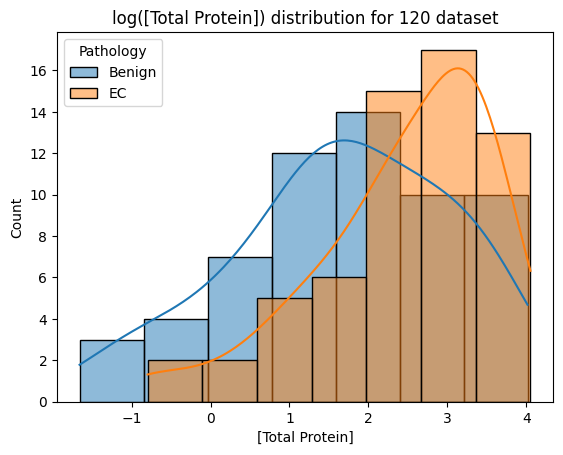

In [18]:
df_120_benign = df_120[df_120['Pathology'] == 0]
df_120_cancer = df_120[df_120['Pathology'] == 1]

df_120_benign = df_120_benign.dropna(subset=['Total_protein_BCA'])
df_120_cancer = df_120_cancer.dropna(subset=['Total_protein_BCA'])

sns.histplot(df_120_benign['Total_protein_BCA'].apply(np.log), label='Benign', kde=True)
sns.histplot(df_120_cancer['Total_protein_BCA'].apply(np.log), label='EC', kde=True)

plt.legend(title='Pathology')
plt.xlabel('[Total Protein]')
plt.ylabel('Count')
plt.title('log([Total Protein]) distribution for 120 dataset')

plt.show()

In this histogram, we observe that for the 60x60 cohort the distribution of $[TP]$ is behaving differently depending on benign and EC samples. Same was happening for all the biomarkers. In the 240 cohort that was not the case: 

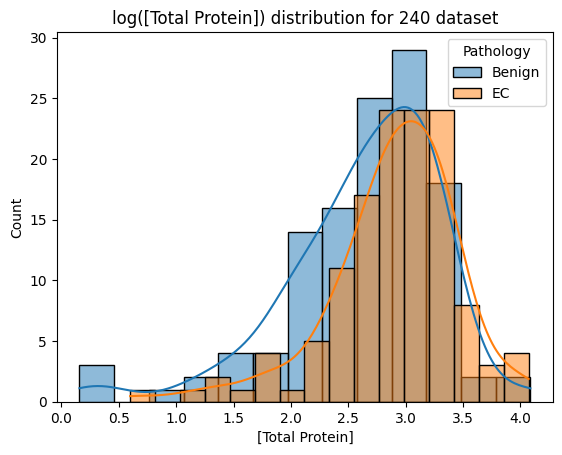

In [19]:
# Do the same for the 240 dataset
df_240_benign = df_240[df_240['Pathology'] == 0]
df_240_cancer = df_240[df_240['Pathology'] == 1]

df_240_benign = df_240_benign.dropna(subset=['Total_protein_BCA'])
df_240_cancer = df_240_cancer.dropna(subset=['Total_protein_BCA'])

sns.histplot(df_240_benign['Total_protein_BCA'].apply(np.log), label='Benign', kde=True)
sns.histplot(df_240_cancer['Total_protein_BCA'].apply(np.log), label='EC', kde=True)

plt.legend(title='Pathology')
plt.xlabel('[Total Protein]')
plt.ylabel('Count')
plt.title('log([Total Protein]) distribution for 240 dataset')

plt.show()

I’m putting these plots here, but I’m not making a comprehensive set of plots in the results folder because all those plots and the differences they express are, at the end of the day, the result of introduction of the correlation with volume of the concentration of biomarkers and the concentration of total protein. Undoing the dilution with the coefficient we have shown in the 'undo dilution’ section, we observe no significative differences between the datasets (maybe a point in favor of undoing the dilution?). 

In [23]:
# undo the dilutions
df_120_benign["final_volume"] = df_120_benign["Collected_volume_mL"] + 0.5
df_120_cancer["final_volume"] = df_120_cancer["Collected_volume_mL"] + 0.5
df_120_benign["final_total_protein"] = df_120_benign["Total_protein_BCA"].multiply(df_120_benign["final_volume"], axis=0).div(df_120_benign["Collected_volume_mL"], axis=0)
df_120_cancer["final_total_protein"] = df_120_cancer["Total_protein_BCA"].multiply(df_120_cancer["final_volume"], axis=0).div(df_120_cancer["Collected_volume_mL"], axis=0)


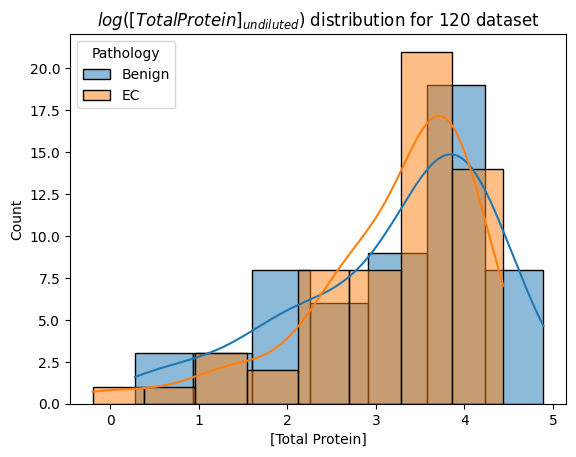

In [24]:
sns.histplot(df_120_benign['final_total_protein'].apply(np.log), label='Benign', kde=True)
sns.histplot(df_120_cancer['final_total_protein'].apply(np.log), label='EC', kde=True)

plt.legend(title='Pathology')
plt.xlabel('[Total Protein]')
plt.ylabel('Count')
plt.title('$log([Total Protein]_{undiluted})$ distribution for 120 dataset')

plt.show()

Same was happening for all the sets of variables we have tried, adding tens of plots of this analysis in the results folder could be misleading and we're avoiding it. 